In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09B.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #09-B <br></center></h2>

<h1><center>Fixed-point iteration<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: The Colebrook equation

The Colebrook equation is a formula used in fluid mechanics to calculate the *friction factor* $f$, which is an important parameter involved in the calculation of pressure loss in pipes. You will learn more about the friction factor and the Colebrook equation if you take a course in fluid mechanics. Here we will use it only to demonstrate the *fixed point iteration* method for solving nonlinear equations. 

The Colebrook equation is as follows:
\begin{equation*}
\frac{1}{\sqrt{f}} = -2 \log_{10} \left(  \frac{2.51}{Re} \frac{1}{\sqrt{f}} + \frac{\epsilon/D}{3.71} \right) 
\end{equation*}

Here $f$ is the unknown friction factor. $\epsilon$ is the roughness of the pipe (measured in meters), $D$ is the diameter of the pipe (measured in meters), and $Re$ is the Reynolds number. These last three are known. 

Notice that $f$ appears on both sides of the equation in a way that cannot be disentangled using standard algebraic operations. Hence, we must use an *numerical* procedure, such as the fixed point iteration. 

### Global constants

In [3]:
Re = 2.3e5          # Reynolds number [-]
epsilon = 1e-6      # Pipe roughness [m]
D = 1e-2            # Pipe diameter [m]

## Part 1.1: Compute $\alpha$ and $\beta$

To simplify the formula, we introduce two new symbols, $\alpha$ and $\beta$:
\begin{equation*}
\alpha = \frac{2.51}{Re} \quad , \quad \beta = \frac{\epsilon/D}{3.71} 
\end{equation*}


The Colebrook equation now becomes:

\begin{equation*}
\frac{1}{\sqrt{f}} = -2 \log_{10} \left( \alpha\frac{1}{\sqrt{f}} + \beta \right) 
\end{equation*}

Compute `alpha` and `beta` for the given values of $Re$, $\epsilon$, and $D$. 

In [4]:
alpha = 2.51/Re
beta = (epsilon/D)/3.71

In [5]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Part 1.2: Function $F(f)$

Bringing all terms to the left-hand side, we obtain a function $F(f)$, whose roots are the values of $f$ that satisfy the Colebrook equation:

\begin{equation*}
F(f) = \frac{1}{\sqrt{f}} + 2 \log_{10} \left(  \frac{\alpha}{\sqrt{f}} + \beta\right) 
\end{equation*}

Implement the function `eval_F(f)` that computes $F(f)$ for a given value or NumPy array `f`.

In [6]:
def eval_F(f):
    F = (1/np.sqrt(f))+2*np.log10((alpha/np.sqrt(f))+beta)
    return F

In [7]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Part 1.3: Function $\bar{F}(x)$

As explained in lecture, to find a root of the function $F(f)$ using FPI, we must first propose an auxiliary function $g$ that satisfies

\begin{equation*}
g(f)=f \quad \Rightarrow \quad F(f)=0
\end{equation*}
That is, a function $g$ whose fixed points are roots of $F$. In the next part we will propose such a function. But first we will make a change of variables that seems intuitively reasonable, and in fact turns out to be very helpful. Define the symbol $x$ with
\begin{equation}
x=\frac{1}{\sqrt{f}}
\end{equation}

Replacing $\frac{1}{\sqrt{f}}$ with $x$ in $F$ we obtain a new and equivalent function $\bar{F}(x)$.

\begin{equation*}
\bar{F}(x) = x + 2 \log_{10} \left(  \alpha\: x + \beta\right)
\end{equation*}

The non-zero roots of $\bar{F}(x)$ relate to the non-zero roots of $F(f)$ through $x=\frac{1}{\sqrt{f}}$. We can therefore find a root $f_r$ of $F$ by first finding a root $x_r$ of $\bar{F}$, and then translating it with $f_r=1/x_r^2$.

Implement the function `eval_Fbar(x)` that computes $\bar{F}(x)$ for a given value or NumPy array `x`.

In [8]:
def eval_Fbar(x):
    Fbar = x + 2*np.log10(alpha*x+beta)
    return Fbar

In [9]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Part 1.4: Function $g(x)$

We now propose a function $g(x)$ on which to perform FPI to obtain a root of $\bar{F}(x)$. An obvious choice (but not necessarily a good one) would be:

\begin{equation*}
g(x) = -2 \log_{10} \left(  \alpha\: x + \beta\right)
\end{equation*}

With this definition it is easy to confirm that $g(x)\!=\!x \Rightarrow \bar{F}(x)\!=\!0$, as required. 

Implement the function `eval_g(x)` that computes $g(x)$ for a given value or NumPy array `x`.


In [10]:
def eval_g(x):
    g = -2*np.log10(alpha*x+beta)
    return g

In [11]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Part 1.5: Eyeball the solution

It's always a good idea to use a plot to get a better understanding of a problem. Here, for example, we'd like to know whether $g$ has any fixed points, how many, and approximately where they are located. With a plot we can also get a sense of whether FPI will converge to a fixed point by observing the slope of $g$. 

Make a plot of $g(x)$ on the interval $[5,10]$, along with the function $h(x)=x$ (the 45 degree line). The fixed point(s) are wherever these two lines intersect. Note the following:

1. Are there any fixed points? How many?
2. Approximately what values do they have?
3. Is $|g'(x)|<1$ in the vicinity of the fixed point(s)? How big is it?
4. How big is the region with $|g'(x)|<1$?

Related to 2, what are the two integers that come immediately before and after the fixed point? That is, if $x_{fp}$ is the fixed point, what is $\text{floor}(x_{fp})$ and $\text{ceil}(x_{fp})$?

In [12]:
floor_xfp = 7
ceil_xfp = 8

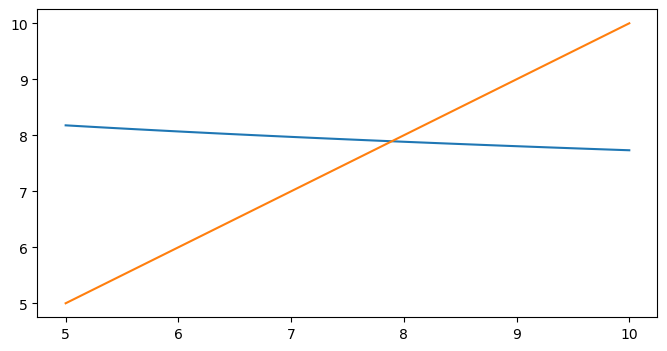

In [13]:
# Plotting cell
fig1, ax1 = plt.subplots(figsize = (8,4))
x = np.linspace(5,10)
y = eval_g(x)
ax1.plot(x, y)
ax1.plot(x,x)


In [14]:
grader.check("q1p5")

q1p5 results: All test cases passed!

## Part 1.6: Check $|g'(x)|<1$

Looking at the plot, it is pretty clear that $|g'(x)|$ is small everywhere. Let's use numerical differentiation to ``confirm'' this. (Confirm is in quotes because we would also have to check that the error in the numerical derivative is not too large. We could do that by bounding the second derivative.)

Implement a function called `check_gprime(g,xmin,xmax,dx)` that receives:
+ `g`: a *function* (in this case `eval_g`)
+ `xmin`, `xmax`, `dx`: the minimum, maximum and step size of a grid on which to evaluate `g`
and then does the following:
1. Estimates $g'(x)$ using forward differencing on the grid just described.
2. Computes and returns the maximum value attained by the magnitude of that estimate. 

In other words it estimates 
$$\underset{x\in[x_{min},x_{max}]}{\text{max}}\; |g'(x)|$$ 
using forward differencing. 

Apply the function to the interval $[5,10]$ with $dx=0.01$. Does this agree with the result from part 1.5?

**Note**: Here we are, for the first time in this course, passing a *function* as an argument to another function. Python allows this and its no big deal. The syntax is as follows. We can define a function `z` that receives a function `f` and returns `f(2)`:

```python
def z(f):
    return f(2)
```

Then, we might call `z` with the exponential function and the absolute value function.

```python
print( z(np.exp) )    # prints 7.389
print( z(np.abs) )    # prints 2
```
Notice that `np.exp` and `np.abs` are written without parentheses when passed into `z`.

In [15]:
def check_gprime(g,xmin,xmax,dx):
    max_gprime = 0.0
    for k in np.arange(xmin,xmax+dx,dx):
        gprime = (g(k+dx)-g(k))/dx
        if abs(gprime) > max_gprime:
            max_gprime = abs(gprime)
    return max_gprime

In [16]:
max_gprime = check_gprime(eval_g,5,10,0.01)
max_gprime

0.11620069053481785

In [17]:
grader.check("q1p6")

q1p6 results: All test cases passed!

## Part 1.7: Implement FPI

The fixed point iteration of a function $g(x)$ is a sequence $x_0, x_1, x_2 ... $ in which $x_0$ is prescribed and the rest are computed with 
\begin{equation*}
x_{k+1} = g(x_{k})
\end{equation*}
The iteration stops if $|x_{k+1}-x_{k}|$ becomes smaller than a tolerance value, or if a maximum sequnce length is reached. 

Implement the function `FPI` that takes as inputs:
+ `g`: The function $g$. 
+ `x0`: The initial value of the sequence
+ `tol`: The tolerance
+ `maxsteps`: The maximum length of the sequence. 

**Notes**:
+ The function should return the FPI sequence as a 1D NumPy array.
+ In the case that the iteration converges, the returned array should include the final evaluation of $g$.  That is, if you coded the stopping criterion as `abs(x[k+1]-x[k])<tol`, then include `x[k+1]` in the output. If you coded the stopping criterion as `abs(x[k]-x[k-1])<tol`, then include `x[k]` in the output.


In [18]:
def FPI(g,x0,tol,maxsteps):

    # Allocate an array of size maxsteps filled with np.nan values
    x = np.zeros(maxsteps)

    # Set the initial value of the sequence to x0
    x[0]= x0

    # Run the iteration until the tolerance 
    # criterion is met or maxsteps are reached. 
    for k in np.arange(1,maxsteps):
        x[k] = g(x[k-1])
        if abs(x[k]-x[k-1]) < tol:
            break
        
    # Remove trailing np.nans if there are any.
    x = x[x != 0]

    return x

In [19]:
# Use this cell to test your function
x_fpi = FPI(g=eval_g,x0=7,tol=1e-5,maxsteps=20)
x_fpi

array([7.        , 7.97141701, 7.88659727, 7.89368204, 7.89308805,
       7.89313784, 7.89313366])

In [20]:
grader.check("q1p7")

q1p7 results: All test cases passed!

## Cobweb plot
Execute the cell below to view a "cobweb plot" of the fixed point iteration. This part is not evaluated.   

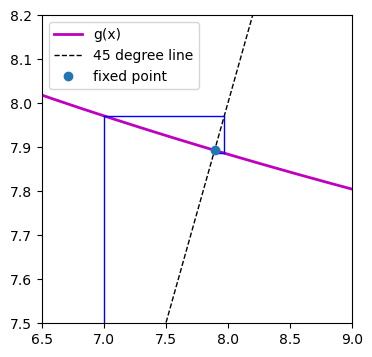

In [21]:
xx = np.arange(5,10,0.01)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(xx,eval_g(xx),color='m',linewidth=2,label='g(x)')
ax.plot(xx,xx,linestyle='--',color='k',linewidth=1,label='45 degree line')

N = x_fpi.shape[0]
g_fpi = eval_g(x_fpi)

for n in range(N):
    ax.plot([x_fpi[n], x_fpi[n]], [x_fpi[n], g_fpi[n]], 'b',linewidth=1)
    ax.plot([x_fpi[n], g_fpi[n]], [g_fpi[n], g_fpi[n]], 'b',linewidth=1)

ax.plot(x_fpi[-1],g_fpi[-1],'o',label='fixed point')

ax.set_ylim(7.5,8.2)
ax.set_xlim(6.5,9)
ax.legend()

## Part 1.8: Compute the friction factor

Use the result of fixed point iteration to compute $f$, the solution of the Colebrook equation. Recall that 
$$x=\frac{1}{\sqrt{f}}$$

In [22]:
x_fpi = FPI(g=eval_g,x0=7,tol=1e-5,maxsteps=20)
f = 1/((x_fpi[-1])**2)

In [23]:
grader.check("q1p8")

q1p8 results: All test cases passed!

# Question 2: A system of nonlinear equations

We will now use fixed point iteration to solve the following system of two non-linear equations with two unknowns $\xi_1$ and $\xi_2$. 

\begin{align*}
10 \xi_1 + \xi_2  &= 1- \sin(\xi_1+\xi_2) \\
-\xi_1 +10 \xi_2 &= 2+ \cos(\xi_1-\xi_2)
\end{align*}

## Part 2.1: Function $f(\xi_1,\xi_2)$

Bringing all of the terms to the left-hand side, we obtain two functions $f_1(\xi_1,\xi_2)$ and $f_2(\xi_1,\xi_2)$ whose roots are the desired solutions.

\begin{align*}
f_1(\xi_1,\xi_2) &= 10 \xi_1 + \xi_2 -1+ \sin(\xi_1+\xi_2)  \\
f_2(\xi_1,\xi_2) &= -\xi_1 +10 \xi_2 -2- \cos(\xi_1-\xi_2)
\end{align*}

Implement `eval_f(xi)`. This function takes as input a 1D NumPy array `xi` which has length 2 and contains $\xi_1$ and $\xi_2$ (in that order). It returns $[f_1(\xi_1,\xi_2),f_2(\xi_1,\xi_2)]$ as a 1D NumPy array with two values.

In [24]:
def eval_f(xi):
    xi1 , xi2 = xi
    f1 = 10*xi1+xi2-1+np.sin(xi1+xi2)
    f2 = -xi1+10*xi2-2-np.cos(xi1-xi2)
    return np.array([f1,f2])

In [25]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Part 2.2: Candidate function for FPI

Perhaps the most obvious way to create an auxiliary "$g$" function for FPI in this case is to isolate $\xi_1$ in the formula for $f_2$ and $\xi_2$ in the formula for $f_1$. This gives us the following two formulas:

\begin{align*}
\xi_1 &= 10 \xi_2 - 2 -\cos(\xi_1-\xi_2)    \\
\xi_2 &= -10 \xi_1 + 1 -  \sin(\xi_1+\xi_2)  
\end{align*}

In this week's discussion session we analyze this option and find that it does not work. Hence we will not pursue it further. 

Instead we now turn to a second possibility for the $g$ function.
\begin{align*}
\xi_1 &= 0.1(1-\xi_2-\sin(\xi_1+\xi_2)) &= g_{A1}(\xi_1,\xi_2) \\
\xi_2 &= 0.1(2 + \xi_1 + \cos(\xi_1-\xi_2)) &= g_{A2}(\xi_1,\xi_2) 
\end{align*}

Don't worry about where this came from. From our perspective it is simply provided to us. To know whether it is a valid candidate, we must verify that it satisfies the basic requirement: that all of its fixed points are roots of $(f_1,f_2)$. That is, 

<center><img src="resources/eqn.png" width="520"/></center>


Implement the function `eval_gA(xi)`. This function takes as input a 1D NumPy array `xi` which has length 2 and contains $\xi_1$ and $\xi_2$ (in that order). It returns $[g_{A1}(\xi_1,\xi_2),g_{A2}(\xi_1,\xi_2)]$ as a 1D NumPy array with two values.

In [26]:
def eval_gA(xi):
    xi1, xi2 = xi
    gA1 = 0.1*(1-xi2-np.sin(xi1+xi2))
    gA2 = 0.1*(2+xi1+np.cos(xi1-xi2))
    return np.array([gA1, gA2])

In [27]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Part 2.3: Multivariable FPI

Next we willl implement the multi-variable version of the fixed-point iteration. 

The function `multiFPI` will be very similar to the single-variable version (`FPI`). Here are the main differences.

+ The variable name `x` is changed to `xi`, and `x0` to `xi0`, in keeping with the mathematical notation.
+ The input parameter `g` is a function from $n$ inputs to $n$ outputs (instead of one input to one output as in `FPI`).
+ The input parameter `xi0` is a 1D NumPy array of length $n$. 
+ The stopping criterion is that the *maximum* of $|\xi_{i,k}-\xi_{i,k-1}|$ over all components $\xi_i$ is less than the tolerance. 
+ The output is a 2D Numpy array. It's first dimension are the iterations and it has two columns for the two unknowns. 
+ We replace `[k]` with `[k,:]` and `[k-1]` with `[k-1,:]` everywhere. 

**Notes**:
+ Same as in part 1.7: In the case that the iteration converges, the returned array should include the final evaluation of $g$. 


In [28]:
def multiFPI(g,xi0,tol,maxsteps):

    # Obtain n, the problem dimension, from the shape of xi0
    n = xi0.shape[0]

    # Allocate an array of shape (maxsteps,n) filled with np.nan values
    xi = np.full([maxsteps,n],np.nan)

    # Set the initial value of the sequence to xi0
    xi[0] = xi0

    # Run the iteration until the tolerance 
    # criterion is met or maxsteps are reached. 
    for k in np.arange(1,maxsteps):
        xi[k,:] = g(xi[k-1,:])
        if (abs(xi[k,:]-xi[k-1,:])< tol).all():
            break
        

    # Remove trailing np.nans if there are any.
    xi = xi[0:k+1,:]
    

    return xi

In [29]:
xi_fpiA = multiFPI(g=eval_gA, xi0=np.zeros(2),tol=0.00001,maxsteps=20)
xi_fpiA

array([[0.        , 0.        ],
       [0.1       , 0.3       ],
       [0.03105817, 0.30800666],
       [0.0359388 , 0.29929524],
       [0.03717146, 0.30014605],
       [0.0368897 , 0.30027925],
       [0.0368904 , 0.30024027],
       [0.03689791, 0.30024138]])

In [30]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Part 2.4: Solution with $g_A$

Run `FPI` with these parameters:
+ `g=eval_gA`
+ `xi0=np.zeros(2)`
+ `tol=1e-5`
+ `maxsteps=20`

Keep the last values in the FPI sequence. Save them as `xi1_A` and `xi2_A` (these are scalars). 

You should verify that this is indeed a root of $f(\xi_1,\xi_2)$ by passing (`xi1_A,xi2_A`) into `eval_f` and observing that the return value is close to (0,0). 

In [31]:
xi_fpiA = multiFPI(g=eval_gA, xi0=np.zeros(2),tol=1e-5,maxsteps=20)
xi1_A = 0.03689791
xi2_A = 0.30024138

In [32]:
grader.check("q2p4")

q2p4 results: All test cases passed!

## Part 2.5: Try it with a different $g$ function

In part 2.4 we successfully applied FPI to solve the system of nonlinear equations. In that sense, we have already completed the task.  Next we will try a different candidate $g$ function, simply to demonstrate that it is possible. 

To find this new function, we first define a transformation from $(\xi_1,\xi_2)$ to a new pair of variables $(\eta_1,\eta_2)$:
\begin{align*}
\eta_1 &= \xi_1+\xi_2 \\
\eta_2 &= \xi_1-\xi_2 
\end{align*}

This is an invertible transformation, in the sense that we can return from $(\eta_1,\eta_2)$ to the original $(\xi_1,\xi_2)$ with
\begin{align*}
\xi_1 &= (\eta_1+\eta_2)/2 \\
\xi_2 &= (\eta_1-\eta_2)/2 
\end{align*}

You should confirm that this is true. Applying this change of variables to the original system of equations, we can obtain a new pair of $g$ functions for FPI in terms of $\eta_1$ and $\eta_2$. We'll call them $g_{B1}(\eta_1,\eta_2)$ and $g_{B2}(\eta_1,\eta_2)$.

\begin{align*}
\eta_1 &= (1/11)\Bigl(-9\eta_2 + 2 -2\sin(\eta_1)\Bigr) &= g_{B1}(\eta_1,\eta_2) \\
\eta_2 &= (1/11)\Bigl(9\eta_1 -4- 2\cos(\eta_2)\Bigr) &= g_{B2}(\eta_1,\eta_2) 
\end{align*}

These formulas are derived in this week's discussion session. We will now apply FPI to $g_{B}$, just as we did with $g_A$. 

Implement the function `eval_gB(eta)`. This function takes as input a 1D NumPy array `eta` which has length 2 and contains $\eta_1$ and $\eta_2$ (in that order). It returns $[g_{B1}(\eta_1,\eta_2),g_{B2}(\eta_1,\eta_2)]$ as a 1D NumPy array with two values.

In [33]:
def eval_gB(eta):
    eta1, eta2 = eta
    gB1 = (1/11)*(-9*eta2+2-2*np.sin(eta1))
    gB2 = (1/11)*(9*eta1-4-2*np.cos(eta2))
    return np.array([gB1, gB2])

In [34]:
grader.check("q2p5")

q2p5 results: All test cases passed!

## Part 2.6: FPI on $g_B$

Run `FPI` with these parameters:
+ `g=eval_gB`
+ `xi0=np.zeros(2)`
+ `tol=1e-5`
+ `maxsteps=100`

Keep the last values in the FPI sequence. Save them as `eta1_B` and `eta2_B` (these are scalars). 

In [35]:
eta_fpiB = multiFPI(g=eval_gB,xi0=np.zeros(2),tol=1e-5,maxsteps=100)

eta1_B = 0.3371424726324304
eta2_B = -0.2633417258565359

In [36]:
grader.check("q2p6")

q2p6 results: All test cases passed!

## Part 2.7: From $(\eta_1,\eta_2)$ to $(\xi_1,\xi_2)$

Apply the reverse transformation to obtain the root $(\xi_1,\xi_2)$ from the fixed-point $(\eta_1,\eta_2)$ found in part 2.6. 

Store these values as variable names `xi1_B` and `xi2_B`.

**Note**: Notice that we have obtained the same root as in part 2.4.

In [37]:
xi1_B = (eta1_B+eta2_B)/2
xi2_B = (eta1_B-eta2_B)/2

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [38]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q1p5 results: All test cases passed!

q1p6 results: All test cases passed!

q1p7 results: All test cases passed!

q1p8 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q2p3 results: All test cases passed!

q2p4 results: All test cases passed!

q2p5 results: All test cases passed!

q2p6 results: All test cases passed!

q2p7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [39]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)